In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from io import BytesIO
import zipfile
import os

In [3]:
# Load your data from a CSV file
df = pd.read_csv('wbdata.csv')

df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
# Handle missing values (e.g., fill with 0)
df = df.fillna(0)


In [5]:
# Melt the dataframe to reshape it
df_melted = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')

In [6]:
# Convert 'Year' to datetime and 'Value' to numeric
df_melted['Year'] = pd.to_datetime(df_melted['Year'], format='%Y')
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [7]:
# Drop unnecessary columns
columns_to_drop = ['Indicator Code']  # Add other columns if not needed
df_melted = df_melted.drop(columns=columns_to_drop)


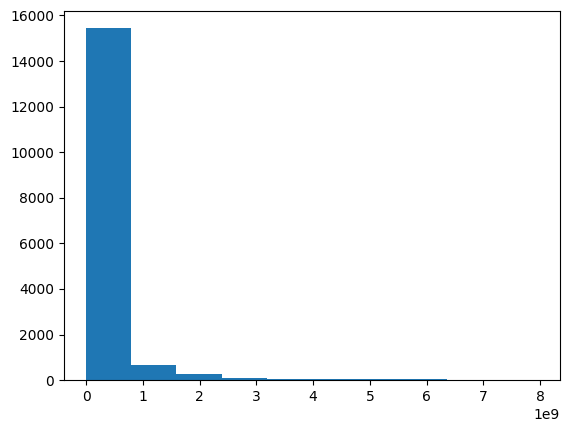

In [8]:
# Explore the distribution (e.g., using histograms or box plots)
plt.hist(df_melted['Value'])
plt.show()
# Handle outliers if necessary


In [9]:
# Explore basic statistics
df_melted.describe()
# Explore trends or patterns over time

,Year,Value
count,16758,1.675800e+04
mean,1991-01-01 03:02:51.428571392,2.147606e+08
min,1960-01-01 00:00:00,0.000000e+00
25%,1975-01-01 00:00:00,9.189412e+05
50%,1991-01-01 00:00:00,6.672167e+06
75%,2007-01-01 00:00:00,4.582618e+07
max,2022-01-01 00:00:00,7.950947e+09
std,NaN,7.084723e+08


In [10]:
# One-hot encoding
df_melted = pd.get_dummies(df_melted, columns=['Country Code'])


In [11]:
df_melted.to_csv('cleaned_data.csv', index=False)

In [12]:
import seaborn as sns

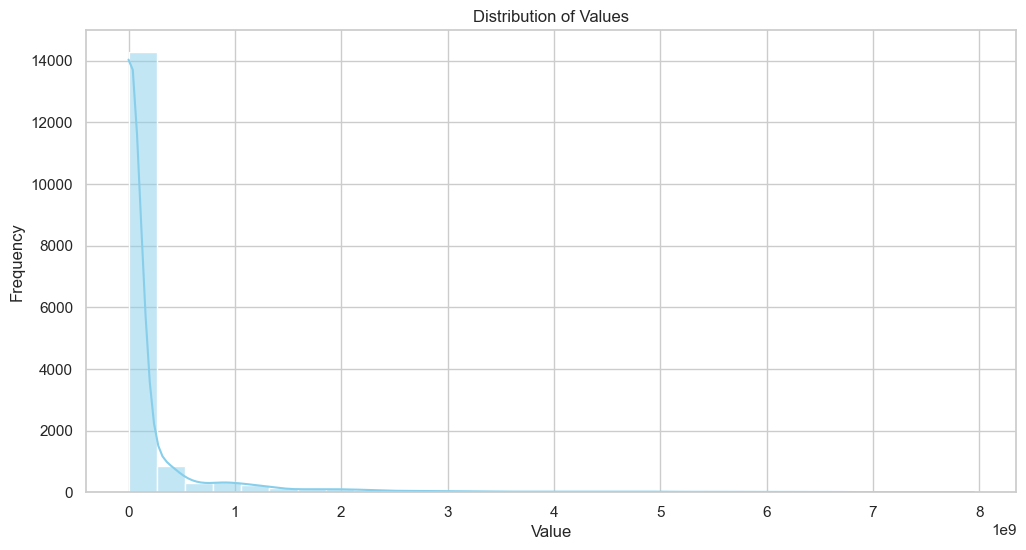

In [13]:
# Assuming df_melted is your cleaned and melted dataframe

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_melted['Value'], kde=True, color='skyblue', bins=30)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# Show the plot
plt.show()

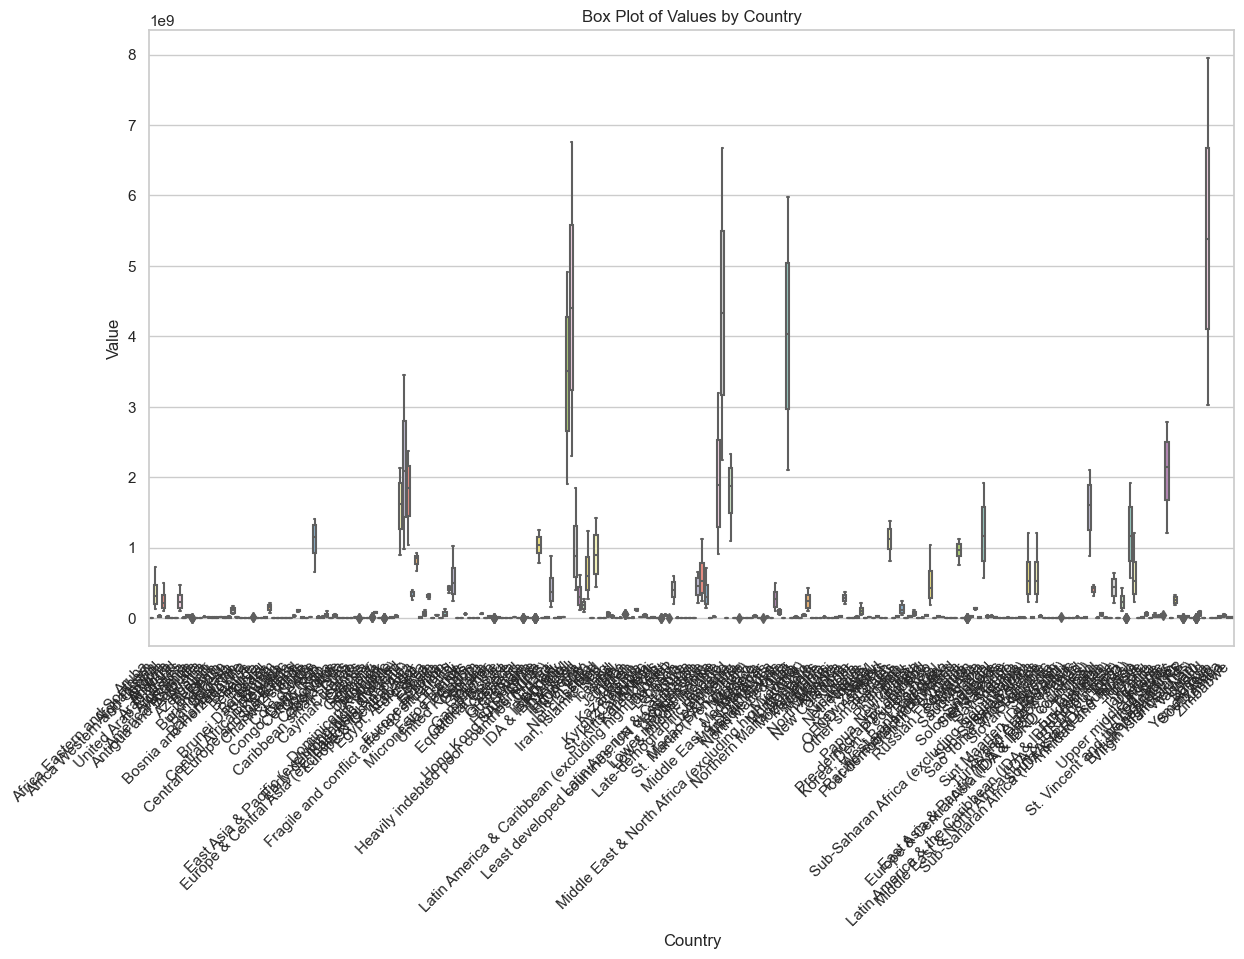

In [14]:
# Assuming df_melted is your cleaned and melted dataframe

# Set up a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country Name', y='Value', data=df_melted, palette='Set3')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Box Plot of Values by Country')

# Show the plot
plt.show()

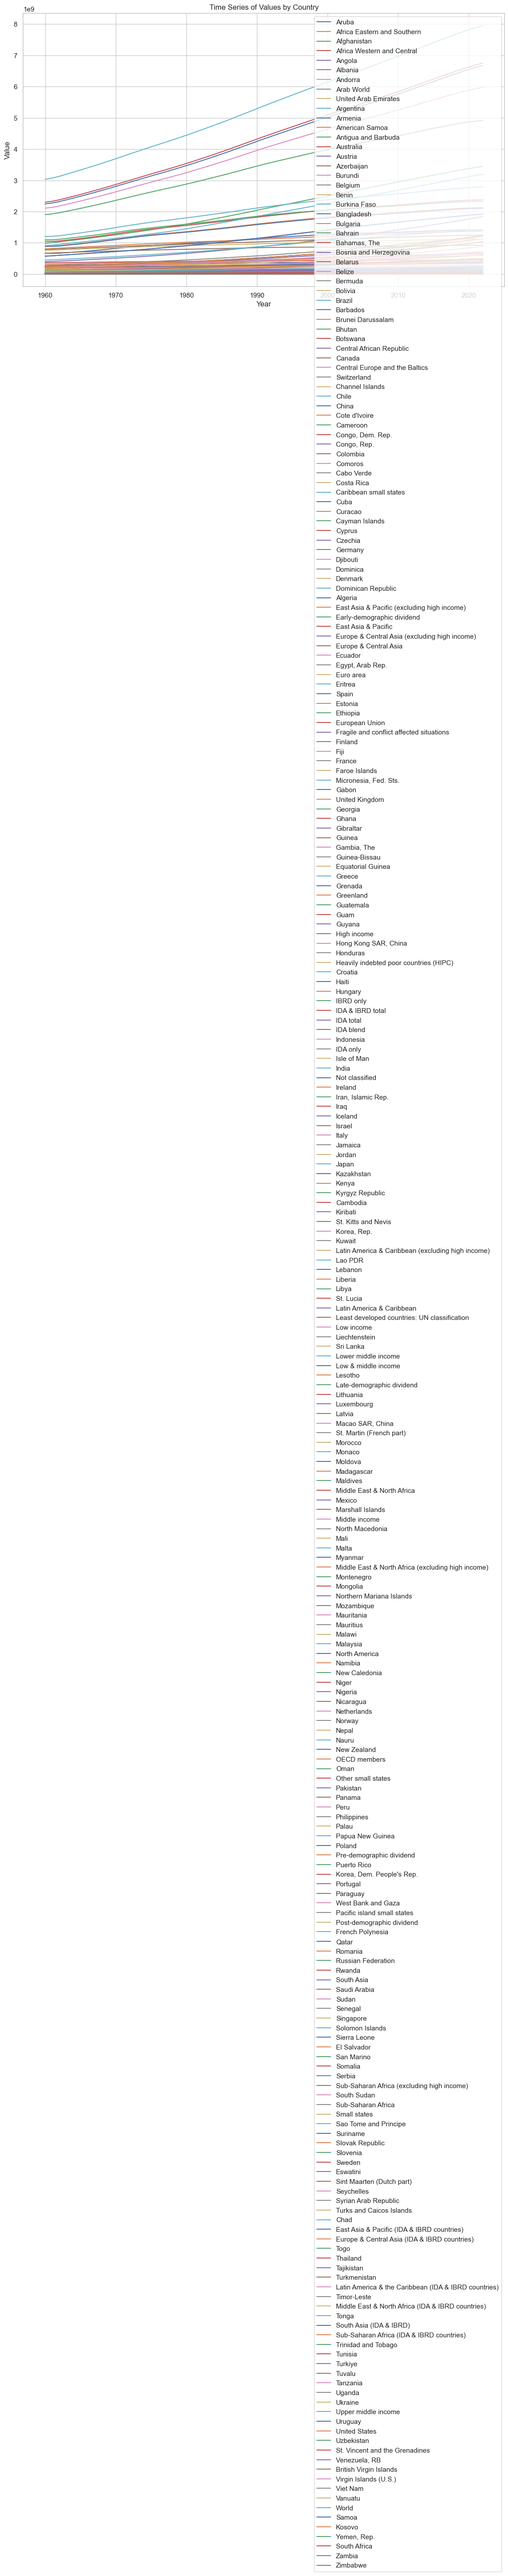

In [15]:
# Assuming df_melted is your cleaned and melted dataframe

# Set the 'Year' column as the index for time series plotting
df_time_series = df_melted.set_index('Year')

# Plot the time series
plt.figure(figsize=(14, 8))
for country in df_time_series['Country Name'].unique():
    plt.plot(df_time_series[df_time_series['Country Name'] == country]['Value'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series of Values by Country')
plt.legend()

# Show the plot
plt.show()


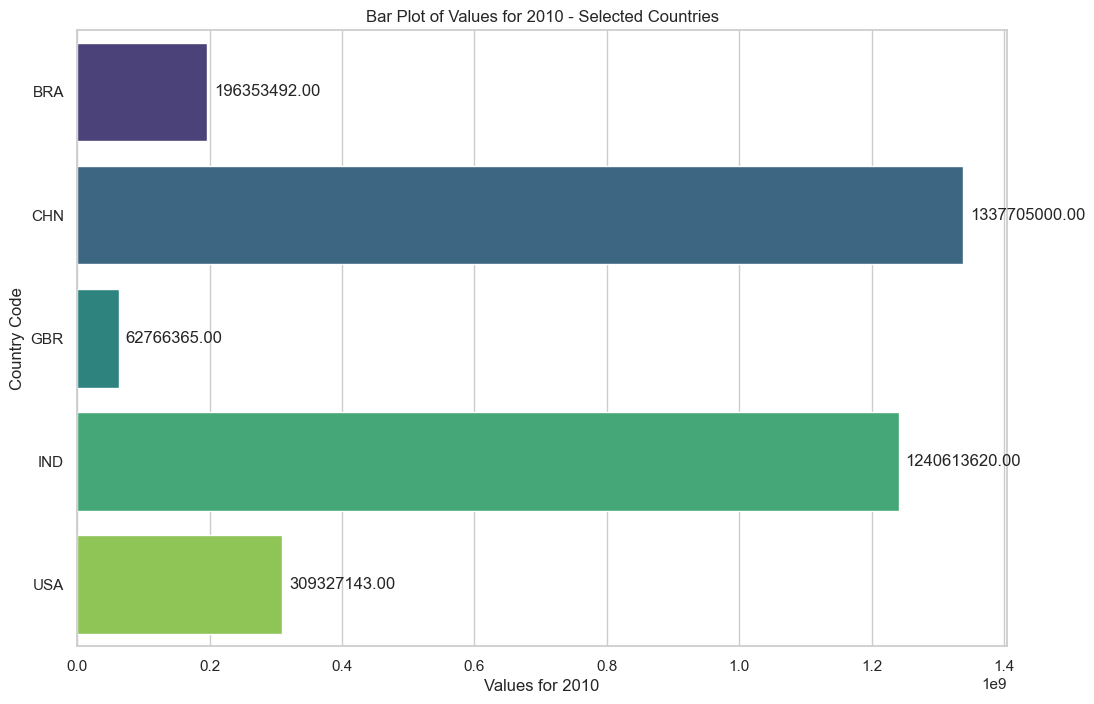

In [24]:
# Assuming df is your DataFrame

# Choose the year for the bar plot
selected_year = '2010'

# Extract relevant columns for the bar plot
selected_columns = ['Country Code', 'Country Name', selected_year]
df_selected = df[selected_columns]

# Drop rows with missing values in the selected year column
df_selected = df_selected.dropna(subset=[selected_year])

# Select the specific countries and their codes you want to include
selected_countries = {'United States', 'China', 'India', 'Brazil', 'United Kingdom'}  # Adjust these values based on your preference
df_selected_countries = df_selected[df_selected['Country Name'].isin(selected_countries)]

# Set up a horizontal bar plot with increased figure size
plt.figure(figsize=(12, 8))

# Use the horizontal bar plot
ax = sns.barplot(x=selected_year, y='Country Code', data=df_selected_countries, palette='viridis')

# Add labels and title
plt.xlabel(f'Values for {selected_year}')
plt.ylabel('Country Code')
plt.title(f'Bar Plot of Values for {selected_year} - Selected Countries')

# Annotate the bars with the values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


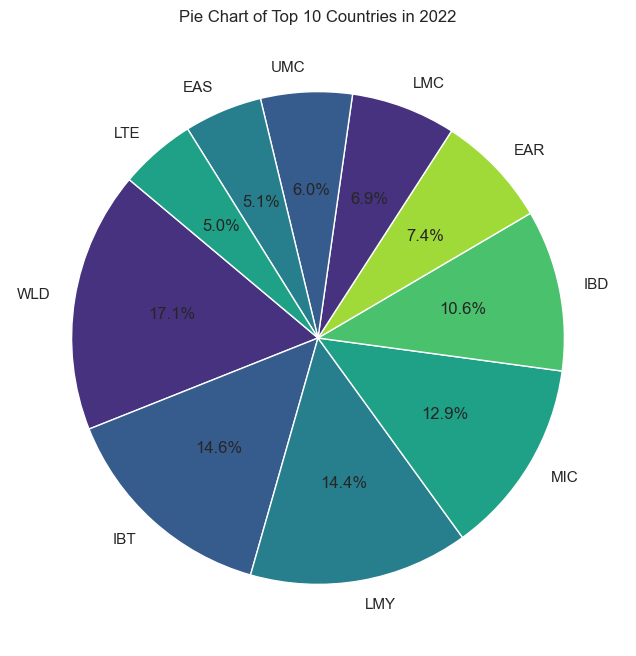